In [36]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

In [37]:
df_fifa_ranking = pd.read_csv('files/input/fifa_ranking-2024-04-04.csv')
df_results = pd.read_csv('files/input/kaggle/results.csv')
df_goalscorers = pd.read_csv('files/input/kaggle/goalscorers.csv')
df_shootouts = pd.read_csv('files/input/kaggle/shootouts.csv')

<Axes: xlabel='home_win'>

home_win
True     23084
False    13341
draw     10701
Name: count, dtype: int64

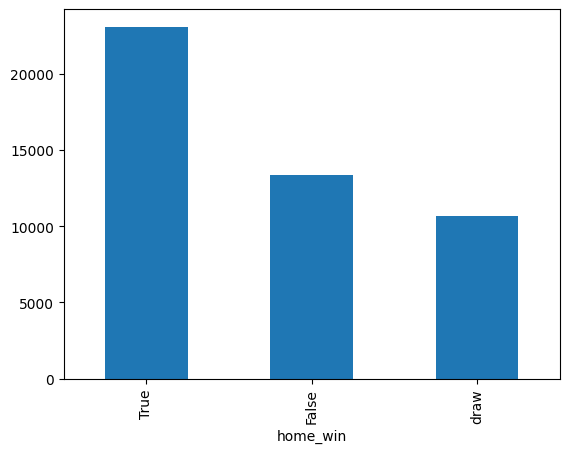

In [38]:
# Spalte home_win befüllen
df_results["home_win"] = df_results.apply(
    lambda row: "draw" if row["home_score"] == row["away_score"] else "True" if row["home_score"] > row["away_score"] else "False",
    axis=1
)

# Verteilung von home_win anzeigen
display(df_results.home_win.value_counts().plot(kind='bar'))
display(df_results.home_win.value_counts())

In [39]:
display(df_fifa_ranking.head(), df_results.head(), df_goalscorers.head(), df_shootouts.head())

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,83.0,Guatemala,GUA,15.0,0.0,83,CONCACAF,1992-12-31
1,32.0,Zambia,ZAM,38.0,0.0,32,CAF,1992-12-31
2,33.0,Portugal,POR,38.0,0.0,33,UEFA,1992-12-31
3,34.0,Austria,AUT,38.0,0.0,34,UEFA,1992-12-31
4,35.0,Colombia,COL,36.0,0.0,35,CONMEBOL,1992-12-31


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [40]:
fifa_ranking_missing = df_fifa_ranking.isnull().sum()
results_missing = df_results.isnull().sum()
goalscorers_missing = df_goalscorers.isnull().sum()

display("Fifa Ranking NaN-values:", fifa_ranking_missing, "Results table NaN-values:", results_missing, "Goalscorers table NaN-values:", goalscorers_missing)

'Fifa Ranking NaN-values:'

rank               8
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

'Results table NaN-values:'

date           0
home_team     15
away_team     15
home_score    51
away_score    51
tournament     0
city           0
country        0
neutral        0
home_win       0
dtype: int64

'Goalscorers table NaN-values:'

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       263
own_goal       2
penalty        2
dtype: int64

In [41]:
fifa_ranking_cleaned = df_fifa_ranking.dropna(subset=['rank'])

results_cleaned = df_results.dropna(subset=['home_team', 'away_team'])

results_cleaned['home_score'].fillna(results_cleaned.groupby('home_team')['home_score'].transform('mean'), inplace=True)
results_cleaned['away_score'].fillna(results_cleaned.groupby('away_team')['away_score'].transform('mean'), inplace=True)

goalscorers_cleaned = df_goalscorers.dropna(subset=['scorer'])

goalscorers_cleaned['minute'].fillna(goalscorers_cleaned['minute'].mean(), inplace=True)

fifa_ranking_cleaned_missing = fifa_ranking_cleaned.isnull().sum()
results_cleaned_missing = results_cleaned.isnull().sum()
goalscorers_cleaned_missing = goalscorers_cleaned.isnull().sum()

fifa_ranking_cleaned_missing, results_cleaned_missing, goalscorers_cleaned_missing

C:\Users\de130063\AppData\Local\Temp\ipykernel_22696\3268967533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cleaned['home_score'].fillna(results_cleaned.groupby('home_team')['home_score'].transform('mean'), inplace=True)
C:\Users\de130063\AppData\Local\Temp\ipykernel_22696\3268967533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cleaned['away_score'].fillna(results_cleaned.groupby('away_team')['away_score'].transform('mean'), inplace=True)
C:\Users\de130063\AppData\Local\Temp\ipykernel_22696\3268967533.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

(rank               0
 country_full       0
 country_abrv       0
 total_points       0
 previous_points    0
 rank_change        0
 confederation      0
 rank_date          0
 dtype: int64,
 date          0
 home_team     0
 away_team     0
 home_score    0
 away_score    0
 tournament    0
 city          0
 country       0
 neutral       0
 home_win      0
 dtype: int64,
 date         0
 home_team    0
 away_team    0
 team         0
 scorer       0
 minute       0
 own_goal     1
 penalty      1
 dtype: int64)

In [42]:
# Add Fifa Ranking
latest_fifa_ranking = df_fifa_ranking.sort_values(by='rank_date').drop_duplicates(subset=['country_full'], keep='last')


results = df_results.merge(latest_fifa_ranking[['country_full', 'total_points']], left_on='home_team', right_on='country_full', how='left')
results.rename(columns={'total_points': 'home_team_strength'}, inplace=True)
results.drop(columns=['country_full'], inplace=True)

results = results.merge(latest_fifa_ranking[['country_full', 'total_points']], left_on='away_team', right_on='country_full', how='left')
results.rename(columns={'total_points': 'away_team_strength'}, inplace=True)
results.drop(columns=['country_full'], inplace=True)

results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,home_team_strength,away_team_strength
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw,1497.46,1794.90
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True,1794.90,1497.46
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True,1497.46,1794.90
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw,1794.90,1497.46
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True,1497.46,1794.90
...,...,...,...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,False,NaN,NaN
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True,False,NaN,NaN
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True,False,NaN,NaN
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True,False,NaN,NaN


In [43]:
results["date"] = pd.to_datetime(results["date"])

In [44]:
# Neue Spalten initialisieren
results['home_team_goals_letzte_Begegnung'] = None
results['home_team_goals_vorletzte_Begegnung'] = None
results['home_team_goals_vorvorletzte_Begegnung'] = None
results['away_team_goals_letzte_Begegnung'] = None
results['away_team_goals_vorletzte_Begegnung'] = None
results['away_team_goals_vorvorletzte_Begegnung'] = None

# Verwenden eines Wörterbuchs, um die letzten Begegnungen zu speichern
last_encounters = {}

# Für jedes Spiel die Anzahl der Tore des Heim- und Auswärtsteams in den letzten drei Begegnungen herausfinden
for i, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    current_date = row['date']
    
    # Erstellen eines Schlüssels für die Paarung der Teams
    match_key = tuple(sorted([home_team, away_team]))
    
    if match_key in last_encounters:
        previous_matches = last_encounters[match_key]
        
        if len(previous_matches) >= 1:
            last_match = previous_matches[-1]
            if last_match['home_team'] == home_team:
                results.at[i, 'home_team_goals_letzte_Begegnung'] = last_match['home_score']
                results.at[i, 'away_team_goals_letzte_Begegnung'] = last_match['away_score']
            else:
                results.at[i, 'home_team_goals_letzte_Begegnung'] = last_match['away_score']
                results.at[i, 'away_team_goals_letzte_Begegnung'] = last_match['home_score']
                
        if len(previous_matches) >= 2:
            second_last_match = previous_matches[-2]
            if second_last_match['home_team'] == home_team:
                results.at[i, 'home_team_goals_vorletzte_Begegnung'] = second_last_match['home_score']
                results.at[i, 'away_team_goals_vorletzte_Begegnung'] = second_last_match['away_score']
            else:
                results.at[i, 'home_team_goals_vorletzte_Begegnung'] = second_last_match['away_score']
                results.at[i, 'away_team_goals_vorletzte_Begegnung'] = second_last_match['home_score']
                
        if len(previous_matches) >= 3:
            third_last_match = previous_matches[-3]
            if third_last_match['home_team'] == home_team:
                results.at[i, 'home_team_goals_vorvorletzte_Begegnung'] = third_last_match['home_score']
                results.at[i, 'away_team_goals_vorvorletzte_Begegnung'] = third_last_match['away_score']
            else:
                results.at[i, 'home_team_goals_vorvorletzte_Begegnung'] = third_last_match['away_score']
                results.at[i, 'away_team_goals_vorvorletzte_Begegnung'] = third_last_match['home_score']
                
    # Aktualisieren der letzten Begegnung für das Team-Paar
    if match_key not in last_encounters:
        last_encounters[match_key] = []
    last_encounters[match_key].append(row)


# Neue Spalten initialisieren
results['home_team_geschossen_letztes_Spiel'] = None
results['home_team_kassiert_letztes_Spiel'] = None
results['home_team_geschossen_vorletztes_Spiel'] = None
results['home_team_kassiert_vorletztes_Spiel'] = None
results['home_team_geschossen_vorvorletztes_Spiel'] = None
results['home_team_kassiert_vorvorletztes_Spiel'] = None

results['away_team_geschossen_letztes_Spiel'] = None
results['away_team_kassiert_letztes_Spiel'] = None
results['away_team_geschossen_vorletztes_Spiel'] = None
results['away_team_kassiert_vorletztes_Spiel'] = None
results['away_team_geschossen_vorvorletztes_Spiel'] = None
results['away_team_kassiert_vorvorletztes_Spiel'] = None

# Verwenden von Wörterbüchern, um die letzten Spiele zu speichern
last_matches = {}

# Funktion zum Aktualisieren der letzten Spiele eines Teams
def update_last_matches(team, scored, conceded, last_matches):
    if team not in last_matches:
        last_matches[team] = []
    last_matches[team].append((scored, conceded))
    if len(last_matches[team]) > 3:
        last_matches[team].pop(0)

# Für jedes Spiel die Tore aus den letzten drei Spielen finden und die neuen Spalten füllen
for i, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    
    # Home Team letzte Spiele
    if home_team in last_matches:
        previous_matches = last_matches[home_team]
        if len(previous_matches) >= 1:
            results.at[i, 'home_team_geschossen_letztes_Spiel'] = previous_matches[-1][0]
            results.at[i, 'home_team_kassiert_letztes_Spiel'] = previous_matches[-1][1]
        if len(previous_matches) >= 2:
            results.at[i, 'home_team_geschossen_vorletztes_Spiel'] = previous_matches[-2][0]
            results.at[i, 'home_team_kassiert_vorletztes_Spiel'] = previous_matches[-2][1]
        if len(previous_matches) >= 3:
            results.at[i, 'home_team_geschossen_vorvorletztes_Spiel'] = previous_matches[-3][0]
            results.at[i, 'home_team_kassiert_vorvorletztes_Spiel'] = previous_matches[-3][1]
    
    # Away Team letzte Spiele
    if away_team in last_matches:
        previous_matches = last_matches[away_team]
        if len(previous_matches) >= 1:
            results.at[i, 'away_team_geschossen_letztes_Spiel'] = previous_matches[-1][0]
            results.at[i, 'away_team_kassiert_letztes_Spiel'] = previous_matches[-1][1]
        if len(previous_matches) >= 2:
            results.at[i, 'away_team_geschossen_vorletztes_Spiel'] = previous_matches[-2][0]
            results.at[i, 'away_team_kassiert_vorletztes_Spiel'] = previous_matches[-2][1]
        if len(previous_matches) >= 3:
            results.at[i, 'away_team_geschossen_vorvorletztes_Spiel'] = previous_matches[-3][0]
            results.at[i, 'away_team_kassiert_vorvorletztes_Spiel'] = previous_matches[-3][1]
    
    # Aktualisieren der letzten Spiele für Home und Away Team
    update_last_matches(home_team, home_score, away_score, last_matches)
    update_last_matches(away_team, away_score, home_score, last_matches)

display(results)
time_cols = ["home_team_goals_letzte_Begegnung", "home_team_goals_vorletzte_Begegnung", "home_team_goals_vorvorletzte_Begegnung", "away_team_goals_letzte_Begegnung",
             "away_team_goals_vorletzte_Begegnung", "away_team_goals_vorvorletzte_Begegnung", "home_team_geschossen_letztes_Spiel", "home_team_kassiert_letztes_Spiel",
             "home_team_geschossen_vorletztes_Spiel", "home_team_kassiert_vorletztes_Spiel", "home_team_geschossen_vorvorletztes_Spiel", "home_team_kassiert_vorvorletztes_Spiel",
             "away_team_geschossen_letztes_Spiel", "away_team_kassiert_letztes_Spiel", "away_team_geschossen_vorletztes_Spiel", "away_team_kassiert_vorletztes_Spiel",
             "away_team_geschossen_vorvorletztes_Spiel", "away_team_kassiert_vorvorletztes_Spiel"]
results[time_cols] = results[time_cols].replace({None: -1})
display(results)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,home_team_geschossen_vorletztes_Spiel,home_team_kassiert_vorletztes_Spiel,home_team_geschossen_vorvorletztes_Spiel,home_team_kassiert_vorvorletztes_Spiel,away_team_geschossen_letztes_Spiel,away_team_kassiert_letztes_Spiel,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw,...,None,None,None,None,None,None,None,None,None,None
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True,...,None,None,None,None,0.0,0.0,None,None,None,None
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True,...,0.0,0.0,None,None,4.0,2.0,0.0,0.0,None,None
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw,...,4.0,2.0,0.0,0.0,2.0,1.0,2.0,4.0,0.0,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True,...,2.0,1.0,2.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,home_team_geschossen_vorletztes_Spiel,home_team_kassiert_vorletztes_Spiel,home_team_geschossen_vorvorletztes_Spiel,home_team_kassiert_vorvorletztes_Spiel,away_team_geschossen_letztes_Spiel,away_team_kassiert_letztes_Spiel,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True,...,0.0,0.0,-1.0,-1.0,4.0,2.0,0.0,0.0,-1.0,-1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw,...,4.0,2.0,0.0,0.0,2.0,1.0,2.0,4.0,0.0,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True,...,2.0,1.0,2.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [45]:
display(results)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,home_team_geschossen_vorletztes_Spiel,home_team_kassiert_vorletztes_Spiel,home_team_geschossen_vorvorletztes_Spiel,home_team_kassiert_vorvorletztes_Spiel,away_team_geschossen_letztes_Spiel,away_team_kassiert_letztes_Spiel,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True,...,0.0,0.0,-1.0,-1.0,4.0,2.0,0.0,0.0,-1.0,-1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw,...,4.0,2.0,0.0,0.0,2.0,1.0,2.0,4.0,0.0,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True,...,2.0,1.0,2.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [46]:
def calculate_team_form(team, date, results_l, N=5):
    team_results = results_l[((results_l['home_team'] == team) | (results_l['away_team'] == team)) & (results_l['date'] < date)].sort_values(by='date').tail(N)
    if team_results.empty:
        return 0, 0
    home_games = team_results[team_results['home_team'] == team]
    away_games = team_results[team_results['away_team'] == team]
    
    avg_goals = (home_games['home_score'].sum() + away_games['away_score'].sum()) / N
    points = (home_games['home_score'] > home_games['away_score']).sum() * 3 + (home_games['home_score'] == home_games['away_score']).sum() + \
             (away_games['away_score'] > away_games['home_score']).sum() * 3 + (away_games['away_score'] == away_games['home_score']).sum()
    
    return avg_goals, points

def parallel_calculate_team_form(row, results_l):
    home_team_form_goals, home_team_form_points = calculate_team_form(row['home_team'], row['date'], results_l)
    away_team_form_goals, away_team_form_points = calculate_team_form(row['away_team'], row['date'], results_l)
    return home_team_form_goals, home_team_form_points, away_team_form_goals, away_team_form_points

def apply_form_calculation(df_chunk):
    df_chunk[["home_team_form_goals", "home_team_form_points", "away_team_form_goals", "away_team_form_points"]] = \
        df_chunk.apply(lambda row: parallel_calculate_team_form(row, results), axis=1, result_type='expand')
    return df_chunk

def parallel_apply(df, func, num_cores=multiprocessing.cpu_count()):
    df_split = np.array_split(df, num_cores)
    pool = Parallel(n_jobs=num_cores)
    
    results_l = []
    for result in pool(delayed(func)(chunk) for chunk in df_split):
        results_l.append(result)
            
    return pd.concat(results_l, axis=0)

results = parallel_apply(results, apply_form_calculation)
results['home_advantage'] = (~results['neutral']).astype(int)

display(results)

C:\Users\de130063\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,away_team_kassiert_letztes_Spiel,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel,home_team_form_goals,home_team_form_points,away_team_form_goals,away_team_form_points,home_advantage
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True,...,2.0,0.0,0.0,-1.0,-1.0,0.4,1.0,0.8,4.0,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw,...,1.0,2.0,4.0,0.0,0.0,1.0,4.0,0.8,4.0,1
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True,...,2.0,1.0,2.0,4.0,2.0,1.2,5.0,1.4,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True,False,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0


In [47]:
results.to_csv('files/temp/results_fifa_ranking.csv', index=False)

In [48]:
results = pd.read_csv('files/temp/results_fifa_ranking.csv')

In [49]:
results["date"] = pd.to_datetime(results["date"])

In [50]:
results_backup = results.copy()
results_backup.to_csv('files/temp/results_fifa_ranking.csv', index=False)

In [51]:
results_bak = results_backup.copy()

In [52]:
results = results_bak.copy()
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,away_team_kassiert_letztes_Spiel,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel,home_team_form_goals,home_team_form_points,away_team_form_goals,away_team_form_points,home_advantage
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True,...,2.0,0.0,0.0,-1.0,-1.0,0.4,1.0,0.8,4.0,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw,...,1.0,2.0,4.0,0.0,0.0,1.0,4.0,0.8,4.0,1
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True,...,2.0,1.0,2.0,4.0,2.0,1.2,5.0,1.4,5.0,1


In [53]:
mask = (results["date"].dt.year == 2024) & (results["tournament"] == "UEFA Euro")
df_predict = results[mask]

# drop knockout tournaments
mask = (df_predict["home_team"].isna()) & (df_predict["away_team"].isna())
df_predict = df_predict[~mask]
df_predict

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,away_team_kassiert_letztes_Spiel,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel,home_team_form_goals,home_team_form_points,away_team_form_goals,away_team_form_points,home_advantage
47075,2024-06-14,Germany,Scotland,NaN,NaN,UEFA Euro,Munich,Germany,False,False,...,1.0,0.0,4.0,3.0,3.0,1.6,7.0,1.2,2.0,1
47076,2024-06-15,Hungary,Switzerland,NaN,NaN,UEFA Euro,Cologne,Germany,True,False,...,0.0,0.0,0.0,0.0,1.0,2.0,11.0,0.6,6.0,0
47077,2024-06-15,Spain,Croatia,NaN,NaN,UEFA Euro,Berlin,Germany,True,False,...,2.0,0.0,0.0,1.0,0.0,2.0,10.0,1.6,10.0,0
47078,2024-06-15,Italy,Albania,NaN,NaN,UEFA Euro,Dortmund,Germany,True,False,...,1.0,0.0,3.0,0.0,0.0,2.0,10.0,0.6,5.0,0
47079,2024-06-16,Slovenia,Denmark,NaN,NaN,UEFA Euro,Stuttgart,Germany,True,False,...,0.0,0.0,0.0,0.0,2.0,1.6,10.0,1.2,10.0,0
47080,2024-06-16,Serbia,England,NaN,NaN,UEFA Euro,Gelsenkirchen,Germany,True,False,...,2.0,0.0,1.0,1.0,1.0,1.4,7.0,1.6,8.0,0
47081,2024-06-16,Poland,Netherlands,NaN,NaN,UEFA Euro,Hamburg,Germany,True,False,...,2.0,4.0,0.0,6.0,0.0,1.8,9.0,2.6,12.0,0
47082,2024-06-17,Austria,France,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,False,...,2.0,0.0,2.0,2.0,2.0,2.6,15.0,4.6,10.0,0
47083,2024-06-17,Romania,Ukraine,NaN,NaN,UEFA Euro,Munich,Germany,True,False,...,1.0,2.0,1.0,0.0,0.0,2.0,10.0,1.8,13.0,0
47084,2024-06-17,Belgium,Slovakia,NaN,NaN,UEFA Euro,Frankfurt,Germany,True,False,...,1.0,0.0,2.0,2.0,1.0,1.8,9.0,1.6,10.0,0


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Entfernen von Zeilen mit fehlenden Werten
results = results.dropna(how='any')

# Hinzufügen des 10-Jahres-Abschnitts
results['decade'] = (results['date'].dt.year // 10) * 10

#results = pd.get_dummies(results, columns=["home_team", "away_team"])
display(results.head())

features = ['decade', 'home_team_strength', 'away_team_strength', 'home_team_form_goals', 'home_team_form_points', 'away_team_form_goals', 'away_team_form_points', 'home_advantage', 'home_team_goals_letzte_Begegnung', 'home_team_goals_vorletzte_Begegnung', 'home_team_goals_vorvorletzte_Begegnung', 'away_team_goals_letzte_Begegnung', 'away_team_goals_vorletzte_Begegnung', 'away_team_goals_vorvorletzte_Begegnung', 'home_team_geschossen_letztes_Spiel', 'home_team_kassiert_letztes_Spiel', 'home_team_geschossen_vorletztes_Spiel', 'home_team_kassiert_vorletztes_Spiel', 'home_team_geschossen_vorvorletztes_Spiel', 'home_team_kassiert_vorvorletztes_Spiel', 'away_team_geschossen_letztes_Spiel', 'away_team_kassiert_letztes_Spiel', 'away_team_geschossen_vorletztes_Spiel', 'away_team_kassiert_vorletztes_Spiel', 'away_team_geschossen_vorvorletztes_Spiel', 'away_team_kassiert_vorvorletztes_Spiel']
features.extend([col for col in results.columns if 'home_team_' in col or 'away_team_' in col])

X = results[features].apply(pd.to_numeric, errors='raise')
y = (results['home_score'] >= results['away_score']).astype(int)  # 1 für Heimsieg, 0 für Auswärtssieg oder Unentschieden

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_test)

for i in range(0,4):
    X_train = pd.concat([X_train, X_train], ignore_index=True).reset_index(drop=True)
    y_train = pd.concat([y_train, y_train], ignore_index=True).reset_index(drop=True)
    X_test = pd.concat([X_test, X_test], ignore_index=True).reset_index(drop=True)
    y_test = pd.concat([y_test, y_test], ignore_index=True).reset_index(drop=True)

X_train = np.asarray(X_train).astype(np.float64) # weird error
X_test = np.asarray(X_test).astype(np.float64)
y_train = np.asarray(y_train).astype(np.float64)
y_test = np.asarray(y_test).astype(np.float64)

log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel,home_team_form_goals,home_team_form_points,away_team_form_goals,away_team_form_points,home_advantage,decade
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1,1870
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,True,...,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,1,1870
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,True,...,0.0,0.0,-1.0,-1.0,0.4,1.0,0.8,4.0,1,1870
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw,...,2.0,4.0,0.0,0.0,1.0,4.0,0.8,4.0,1,1870
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,True,...,1.0,2.0,4.0,2.0,1.2,5.0,1.4,5.0,1,1870


,decade,home_team_strength,away_team_strength,home_team_form_goals,home_team_form_points,away_team_form_goals,away_team_form_points,home_advantage,home_team_goals_letzte_Begegnung,home_team_goals_vorletzte_Begegnung,...,away_team_geschossen_letztes_Spiel,away_team_kassiert_letztes_Spiel,away_team_geschossen_vorletztes_Spiel,away_team_kassiert_vorletztes_Spiel,away_team_geschossen_vorvorletztes_Spiel,away_team_kassiert_vorvorletztes_Spiel,home_team_form_goals,home_team_form_points,away_team_form_goals,away_team_form_points
37966,2010,1644.21,1497.46,2.6,12.0,1.2,11.0,1,2.0,1.0,...,2.0,2.0,1.0,0.0,1.0,0.0,2.6,12.0,1.2,11.0
4735,1950,1840.59,1644.21,4.2,12.0,1.6,5.0,1,6.0,3.0,...,1.0,1.0,3.0,6.0,1.0,3.0,4.2,12.0,1.6,5.0
13840,1980,1840.59,1727.50,2.0,8.0,2.0,13.0,1,0.0,1.0,...,1.0,0.0,3.0,2.0,2.0,0.0,2.0,8.0,2.0,13.0
5196,1960,1445.38,1661.11,3.0,10.0,2.0,7.0,1,1.0,1.0,...,3.0,0.0,3.0,3.0,3.0,1.0,3.0,10.0,2.0,7.0
24332,2000,1225.68,1624.73,0.8,7.0,1.2,5.0,1,0.0,4.0,...,1.0,2.0,2.0,2.0,0.0,1.0,0.8,7.0,1.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46115,2020,1445.38,1475.62,0.6,4.0,0.8,6.0,0,0.0,0.0,...,0.0,1.0,0.0,2.0,3.0,2.0,0.6,4.0,0.8,6.0
26798,2000,1307.53,1266.52,1.0,6.0,1.2,4.0,1,0.0,0.0,...,1.0,3.0,2.0,2.0,1.0,2.0,1.0,6.0,1.2,4.0
29127,2000,1220.65,974.30,1.8,7.0,1.0,4.0,1,4.0,2.0,...,0.0,4.0,0.0,2.0,2.0,1.0,1.8,7.0,1.0,4.0
3634,1950,1532.20,49.00,3.4,10.0,2.0,5.0,1,2.0,5.0,...,2.0,2.0,1.0,3.0,1.0,2.0,3.4,10.0,2.0,5.0


C:\Users\de130063\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7532993597282112,
 0.7739065974796145,
 0.9349811929070392,
 0.8468526930564568)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rfc_model = RandomForestClassifier(n_estimators=200, random_state=42)
rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

display(f"Accuracy: {accuracy}")
display("Classification Report:")
print(report)
display("Confusion Matrix:")
display(conf_matrix)

'Accuracy: 0.758264732784529'

'Classification Report:'

              precision    recall  f1-score   support

         0.0       0.61      0.31      0.41     33120
         1.0       0.78      0.93      0.85     89328

    accuracy                           0.76    122448
   macro avg       0.69      0.62      0.63    122448
weighted avg       0.73      0.76      0.73    122448



'Confusion Matrix:'

array([[10128, 22992],
       [ 6608, 82720]], dtype=int64)

In [56]:
df_predict.dtypes

date                                        datetime64[ns]
home_team                                           object
away_team                                           object
home_score                                         float64
away_score                                         float64
tournament                                          object
city                                                object
country                                             object
neutral                                               bool
home_win                                            object
home_team_strength                                 float64
away_team_strength                                 float64
home_team_goals_letzte_Begegnung                   float64
home_team_goals_vorletzte_Begegnung                float64
home_team_goals_vorvorletzte_Begegnung             float64
away_team_goals_letzte_Begegnung                   float64
away_team_goals_vorletzte_Begegnung                float

In [57]:
# display(df_predict.head())

new_games_features = df_predict.drop(columns=['home_score', 'away_score']).dropna(how="any")
new_games_features = pd.get_dummies(new_games_features, columns=["home_team", "away_team"])

new_columns = [col for col in features if col not in new_games_features.columns]
for col in new_columns:
    new_games_features[col] = 0

# Make predictions on the new data
new_predictions = model.predict(new_games_features[features])
new_prediction_pob = model.predict_proba(new_games_features[features])

# Add predictions to the 'df_predict' DataFrame
new_games_features['predicted_outcome'] = new_predictions
new_games_features["predicted_outcome_prob"] = new_prediction_pob[:, 1]
new_games_features["predicted_outcome_prob"] = new_games_features["predicted_outcome_prob"].round(2)
new_games_features

C:\Users\de130063\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\de130063\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,date,tournament,city,country,neutral,home_win,home_team_strength,away_team_strength,home_team_goals_letzte_Begegnung,home_team_goals_vorletzte_Begegnung,...,away_team_Scotland,away_team_Serbia,away_team_Slovakia,away_team_Slovenia,away_team_Spain,away_team_Switzerland,away_team_Ukraine,decade,predicted_outcome,predicted_outcome_prob
47075,2024-06-14,UEFA Euro,Munich,Germany,False,False,1644.21,1497.46,3.0,2.0,...,True,False,False,False,False,False,False,0,1.0,0.72
47076,2024-06-15,UEFA Euro,Cologne,Germany,True,False,1532.20,1616.41,2.0,2.0,...,False,False,False,False,False,True,False,0,0.0,0.43
47077,2024-06-15,UEFA Euro,Berlin,Germany,True,False,1727.50,1721.07,0.0,5.0,...,False,False,False,False,False,False,False,0,0.0,0.50
47078,2024-06-15,UEFA Euro,Dortmund,Germany,True,False,1724.60,1375.10,3.0,1.0,...,False,False,False,False,False,False,False,0,1.0,0.81
47079,2024-06-16,UEFA Euro,Stuttgart,Germany,True,False,1427.84,1602.72,1.0,1.0,...,False,False,False,False,False,False,False,0,0.0,0.39
47080,2024-06-16,UEFA Euro,Gelsenkirchen,Germany,True,False,1514.20,1794.90,1.0,-1.0,...,False,False,False,False,False,False,False,0,0.0,0.33
47081,2024-06-16,UEFA Euro,Hamburg,Germany,True,False,1531.49,1742.29,0.0,2.0,...,False,False,False,False,False,False,False,0,0.0,0.32
47082,2024-06-17,UEFA Euro,Düsseldorf,Germany,True,False,1554.86,1840.59,0.0,1.0,...,False,False,False,False,False,False,False,0,0.0,0.40
47083,2024-06-17,UEFA Euro,Munich,Germany,True,False,1468.17,1568.86,3.0,2.0,...,False,False,False,False,False,False,True,0,0.0,0.37
47084,2024-06-17,UEFA Euro,Frankfurt,Germany,True,False,1795.23,1461.55,2.0,1.0,...,False,False,True,False,False,False,False,0,1.0,0.64


In [58]:
# Identifizieren der Dummy-kodierten Spalten
home_team_cols = [col for col in new_games_features.columns if col.startswith('home_team_')]
away_team_cols = [col for col in new_games_features.columns if col.startswith('away_team_')]

home_team_cols.remove('home_team_strength')
away_team_cols.remove('away_team_strength')
home_team_cols.remove("home_team_form_goals")
away_team_cols.remove("away_team_form_goals")
home_team_cols.remove("home_team_form_points")
away_team_cols.remove("away_team_form_points")
home_team_cols.remove("home_team_goals_letzte_Begegnung")
away_team_cols.remove("away_team_goals_letzte_Begegnung")
home_team_cols.remove("home_team_goals_vorletzte_Begegnung")
away_team_cols.remove("away_team_goals_vorletzte_Begegnung")
home_team_cols.remove("home_team_goals_vorvorletzte_Begegnung")
away_team_cols.remove("away_team_goals_vorvorletzte_Begegnung")
home_team_cols.remove("home_team_geschossen_letztes_Spiel")
away_team_cols.remove("away_team_geschossen_letztes_Spiel")
home_team_cols.remove("home_team_kassiert_letztes_Spiel")
away_team_cols.remove("away_team_kassiert_letztes_Spiel")
home_team_cols.remove("home_team_geschossen_vorletztes_Spiel")
away_team_cols.remove("away_team_geschossen_vorletztes_Spiel")
home_team_cols.remove("home_team_kassiert_vorletztes_Spiel")
away_team_cols.remove("away_team_kassiert_vorletztes_Spiel")
home_team_cols.remove("home_team_geschossen_vorvorletztes_Spiel")
away_team_cols.remove("away_team_geschossen_vorvorletztes_Spiel")
home_team_cols.remove("home_team_kassiert_vorvorletztes_Spiel")
away_team_cols.remove("away_team_kassiert_vorvorletztes_Spiel")


# Zusammenführen der Dummy-Spalten zu einer einzigen Spalte
new_games_features['home_team'] = new_games_features[home_team_cols].idxmax(axis=1).str.replace('home_team_', '')
new_games_features['away_team'] = new_games_features[away_team_cols].idxmax(axis=1).str.replace('away_team_', '')


def determine_winner(row):
    if round(row["predicted_outcome_prob"], 2) > 0.52:
        return row["home_team"]
    elif round(row["predicted_outcome_prob"], 2) < 0.45:
        return row["away_team"]
    else:
        return "Draw"

new_games_features["predicted_Winner"] = new_games_features.apply(determine_winner, axis=1)

acutal_games = {
    47075: "Germany",
    47076: "Switzerland",
    47077: "Spain",
    47078: "Italy",
    47079: "Draw",
    47080: "England",
    47081: "Netherlands",
    47082: "France",
    47083: "Romania",
    47084: "Slovakia",
    47085: "Turkey",
    47087: "Germany",
    47088: "Draw",
    47089: "Draw",
    47090: "Spain",
    47091: "Draw",
    47092: "Draw",
    47093: "Not played",
    47094: "Not played",
    47095: "Not played",
    47096: "Not played",
    47097: "Not played",
    47098: "Not played",
    47099: "Not played",
    47100: "Not played",
    47101: "Not played",
    47102: "Not played",
    47103: "Not played",
    47104: "Not played",
    47105: "Not played",
    47106: "Not played",
}

new_games_features["actual_winner"] = new_games_features.index.map(acutal_games)

filtered_df = new_games_features[new_games_features["actual_winner"] != "Not played"]

# Count True Positives
true_positives = (filtered_df["predicted_Winner"] == filtered_df["actual_winner"]).sum()

# Count False Positives
false_positives = (filtered_df["predicted_Winner"] != filtered_df["actual_winner"]).sum()

# Display the counts
print("Correct Prediction:", true_positives, "False Prediction:", false_positives)

new_games_features

Correct Prediction: 9 False Prediction: 11


,date,tournament,city,country,neutral,home_win,home_team_strength,away_team_strength,home_team_goals_letzte_Begegnung,home_team_goals_vorletzte_Begegnung,...,away_team_Spain,away_team_Switzerland,away_team_Ukraine,decade,predicted_outcome,predicted_outcome_prob,home_team,away_team,predicted_Winner,actual_winner
47075,2024-06-14,UEFA Euro,Munich,Germany,False,False,1644.21,1497.46,3.0,2.0,...,False,False,False,0,1.0,0.72,Germany,Scotland,Germany,Germany
47076,2024-06-15,UEFA Euro,Cologne,Germany,True,False,1532.20,1616.41,2.0,2.0,...,False,True,False,0,0.0,0.43,Hungary,Switzerland,Switzerland,Switzerland
47077,2024-06-15,UEFA Euro,Berlin,Germany,True,False,1727.50,1721.07,0.0,5.0,...,False,False,False,0,0.0,0.50,Spain,Croatia,Draw,Spain
47078,2024-06-15,UEFA Euro,Dortmund,Germany,True,False,1724.60,1375.10,3.0,1.0,...,False,False,False,0,1.0,0.81,Italy,Albania,Italy,Italy
47079,2024-06-16,UEFA Euro,Stuttgart,Germany,True,False,1427.84,1602.72,1.0,1.0,...,False,False,False,0,0.0,0.39,Slovenia,Denmark,Denmark,Draw
47080,2024-06-16,UEFA Euro,Gelsenkirchen,Germany,True,False,1514.20,1794.90,1.0,-1.0,...,False,False,False,0,0.0,0.33,Serbia,England,England,England
47081,2024-06-16,UEFA Euro,Hamburg,Germany,True,False,1531.49,1742.29,0.0,2.0,...,False,False,False,0,0.0,0.32,Poland,Netherlands,Netherlands,Netherlands
47082,2024-06-17,UEFA Euro,Düsseldorf,Germany,True,False,1554.86,1840.59,0.0,1.0,...,False,False,False,0,0.0,0.40,Austria,France,France,France
47083,2024-06-17,UEFA Euro,Munich,Germany,True,False,1468.17,1568.86,3.0,2.0,...,False,False,True,0,0.0,0.37,Romania,Ukraine,Ukraine,Romania
47084,2024-06-17,UEFA Euro,Frankfurt,Germany,True,False,1795.23,1461.55,2.0,1.0,...,False,False,False,0,1.0,0.64,Belgium,Slovakia,Belgium,Slovakia


In [59]:
len(new_games_features)

33